Graphe correspondant du pattern:
Les 3 premiers pics sont à theta=
[26.90731396 23.28992938 38.52616502]

leurs indices hkl associés:
[{'hkl': (2, 1, 1), 'multiplicity': 6}
 {'hkl': (1, 1, 0), 'multiplicity': 6}
 {'hkl': (1, 0, -1), 'multiplicity': 6}]

les 3 premiers pics par angle à apparaître:
[11.50195312 22.29996938 23.12187615]

leurs indices hkl associés:
[[{'hkl': (1, 1, 1), 'multiplicity': 2}]
 [{'hkl': (1, 0, 0), 'multiplicity': 6}]
 [{'hkl': (2, 2, 2), 'multiplicity': 2}]]


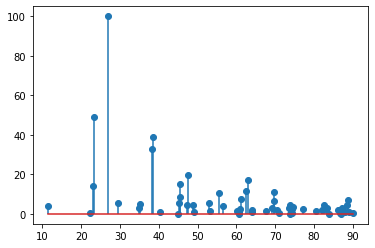

In [8]:
from pymatgen import Structure
from matplotlib import pyplot as plt
from pymatgen import symmetry
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.core.operations import SymmOp
from pymatgen.analysis.diffraction import xrd
import numpy as np
with MPRester("izD7mJmnjhUOKyWGtZ") as m:
    structure = m.get_structure_by_material_id("mp-27869")
    w = CifWriter(structure)
    w.write_file('mp-27869.cif')
    cal =xrd.XRDCalculator()
    patter =cal.get_pattern(structure,two_theta_range=(0, 90))
    
    print("Graphe correspondant du pattern:")
    plt.stem(patter.x,patter.y,use_line_collection=True)
    sorty =np.sort(patter.y)
    
    n =np.size(patter.x)
    sorteur =np.zeros(n)
    hkls =patter.hkls.copy()
    
    for i in range(0,n):
        index =np.where(patter.y == sorty[i])
        sorteur[i] =patter.x[index]
        hkls[i] =patter.hkls[index[0][0]][0]
        
    print("Les 3 premiers pics sont à theta=")
    pics =np.array([sorteur[n-1] ,sorteur[n-2] ,sorteur[n-3] ])
    print(pics)
    print("")
    
    print("leurs indices hkl associés:")
    picshkl =np.array([hkls[n-1] ,hkls[n-2] ,hkls[n-3] ])
    print(picshkl)
    print("")
  
    print("les 3 premiers pics par angle à apparaître:")
    picsangl =np.array([patter.x[0] ,patter.x[1] ,patter.x[2] ])
    print(picsangl)
    print("")
    
    print("leurs indices hkl associés:")
    picshkl2 =np.array([patter.hkls[0], patter.hkls[1] ,patter.hkls[2] ])
    print(picshkl2)
    
    